In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Import Data

In [2]:
data = pd.read_csv('./data/A17U-SI.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-31,1.514444,1.650356,1.514444,1.533860,0.625674,5103019
1,2008-11-03,1.630940,1.776559,1.630940,1.747436,0.712794,5438825
2,2008-11-04,1.698896,1.747436,1.630940,1.640648,0.669234,4405654
3,2008-11-05,1.679480,1.776559,1.660064,1.766851,0.720713,3008865
4,2008-11-06,1.601816,1.698896,1.572692,1.689188,0.689034,3841170


In [3]:
# Check for missing values
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Isolate Target Columns
df = data.loc[:, ['Date', 'Close']]
df.set_index('Date', inplace=True)

# Set to date-time index
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')
df

,Close
Date,
2008-10-31,1.533860
2008-11-01,NaN
2008-11-02,NaN
2008-11-03,1.747436
2008-11-04,1.640648
...,...
2023-10-26,2.500000
2023-10-27,2.510000
2023-10-28,NaN


#### Handling Gaps in weekends

In [5]:
# Default option: use last observed data point
df.fillna(method='ffill', inplace=True)

<AxesSubplot:title={'center':'A17U.SI Time Series'}, xlabel='Date'>

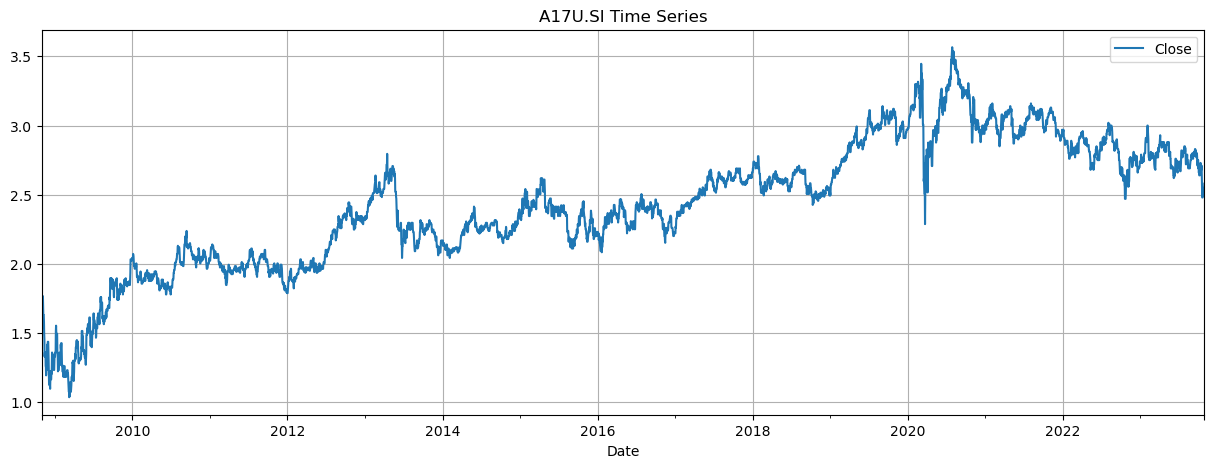

In [6]:
df.plot(title='A17U.SI Time Series',figsize=(15,5), grid=True)

<AxesSubplot:title={'center':'First Order Differencing'}, xlabel='Date'>

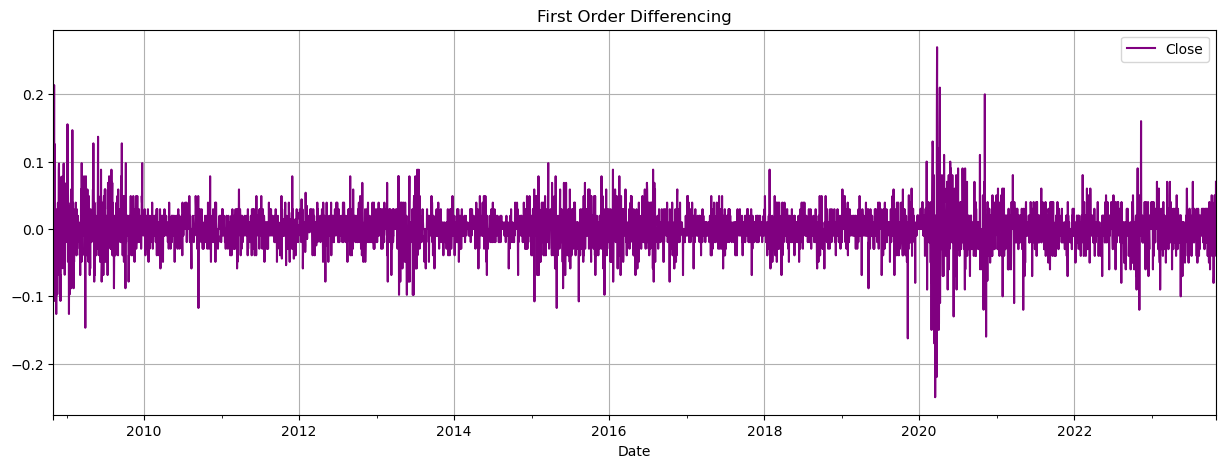

In [7]:
df.diff().plot(title='First Order Differencing',figsize=(15,5), grid=True, color='purple')

### Fuzzy Time Series

In [8]:
from pyFTS.partitioners import Grid
from pyFTS.common import FLR
from pyFTS.models import chen
from pyFTS.common import Util
from pyFTS.common import Transformations

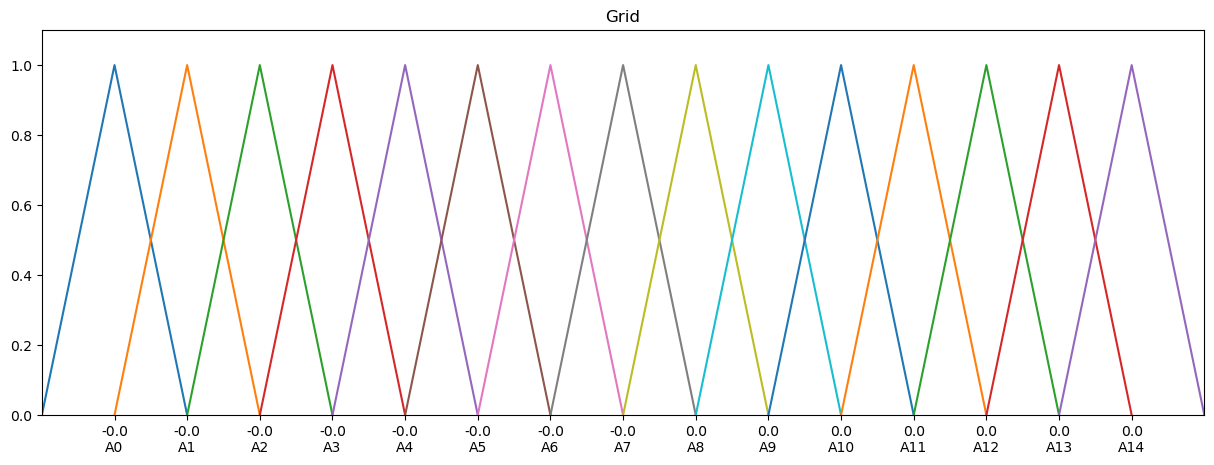

In [106]:
# Data Partitioning and MF generation
n_partitions = 15
input_data = df.diff()[1:].values.reshape(-1,)

fs = Grid.GridPartitioner(data=input_data, npart=n_partitions)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
fs.plot(ax)

In [107]:
# Fuzzification
fuzzyfied = fs.fuzzyfy(input_data, method='maximum', mode='sets')
fuzzyfied

['A7',
 'A7',
 'A13',
 'A4',
 'A11',
 'A5',
 'A6',
 'A7',
 'A7',
 'A6',
 'A5',
 'A6',
 'A4',
 'A8',
 'A7',
 'A7',
 'A7',
 'A5',
 'A7',
 'A5',
 'A8',
 'A7',
 'A7',
 'A7',
 'A10',
 'A10',
 'A6',
 'A9',
 'A7',
 'A7',
 'A5',
 'A5',
 'A4',
 'A5',
 'A7',
 'A7',
 'A7',
 'A7',
 'A6',
 'A9',
 'A8',
 'A6',
 'A7',
 'A7',
 'A9',
 'A7',
 'A9',
 'A10',
 'A7',
 'A7',
 'A7',
 'A7',
 'A5',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'A8',
 'A9',
 'A7',
 'A7',
 'A8',
 'A7',
 'A7',
 'A11',
 'A8',
 'A6',
 'A6',
 'A8',
 'A7',
 'A7',
 'A4',
 'A7',
 'A6',
 'A5',
 'A7',
 'A7',
 'A7',
 'A7',
 'A8',
 'A8',
 'A9',
 'A5',
 'A7',
 'A7',
 'A7',
 'A7',
 'A11',
 'A6',
 'A8',
 'A7',
 'A7',
 'A5',
 'A5',
 'A7',
 'A6',
 'A7',
 'A7',
 'A7',
 'A6',
 'A7',
 'A8',
 'A7',
 'A8',
 'A7',
 'A7',
 'A6',
 'A6',
 'A8',
 'A7',
 'A6',
 'A7',
 'A7',
 'A8',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'A7',
 'A6',
 'A6',
 'A5',
 'A7',
 'A7',
 'A6',
 'A9',
 'A7',
 'A6',
 'A10',
 'A7',
 'A7',
 'A6',
 'A6',
 'A8',
 'A8',
 'A9',
 'A7',
 'A7'

In [108]:
# Temporal Patterns
patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A7 -> A7', 'A7 -> A13', 'A13 -> A4', 'A4 -> A11', 'A11 -> A5', 'A5 -> A6', 'A6 -> A7', 'A7 -> A6', 'A6 -> A5', 'A6 -> A4', 'A4 -> A8', 'A8 -> A7', 'A7 -> A5', 'A5 -> A7', 'A5 -> A8', 'A7 -> A10', 'A10 -> A10', 'A10 -> A6', 'A6 -> A9', 'A9 -> A7', 'A5 -> A5', 'A5 -> A4', 'A4 -> A5', 'A9 -> A8', 'A8 -> A6', 'A7 -> A9', 'A9 -> A10', 'A10 -> A7', 'A7 -> A8', 'A8 -> A9', 'A7 -> A11', 'A11 -> A8', 'A6 -> A6', 'A6 -> A8', 'A7 -> A4', 'A4 -> A7', 'A8 -> A8', 'A9 -> A5', 'A11 -> A6', 'A6 -> A10', 'A7 -> A3', 'A3 -> A8', 'A11 -> A7', 'A8 -> A11', 'A8 -> A5', 'A9 -> A6', 'A8 -> A10', 'A8 -> A4', 'A9 -> A4', 'A10 -> A5', 'A9 -> A9', 'A3 -> A7', 'A10 -> A8', 'A10 -> A11', 'A11 -> A10', 'A4 -> A9', 'A3 -> A4', 'A7 -> A1', 'A1 -> A3', 'A1 -> A12', 'A12 -> A14', 'A14 -> A6', 'A5 -> A10', 'A11 -> A13', 'A5 -> A9', 'A10 -> A9', 'A7 -> A12', 'A12 -> A6']


In [111]:
# Rule Generation
model = chen.ConventionalFTS(partitioner=fs)
model.fit(input_data)
print(model)

Conventional FTS:
A13 -> A4
A14 -> A6
A3 -> A4,A7,A8
A5 -> A10,A4,A5,A6,A7,A8,A9
A6 -> A10,A4,A5,A6,A7,A8,A9
A9 -> A10,A4,A5,A6,A7,A8,A9
A7 -> A1,A10,A11,A12,A13,A3,A4,A5,A6,A7,A8,A9
A1 -> A12,A3
A8 -> A10,A11,A4,A5,A6,A7,A8,A9
A10 -> A10,A11,A5,A6,A7,A8,A9
A4 -> A11,A5,A7,A8,A9
A11 -> A10,A13,A5,A6,A7,A8
A12 -> A14,A6



In [113]:
# Util.plot_rules(model, size=[15,5] , rules_by_axis=10)

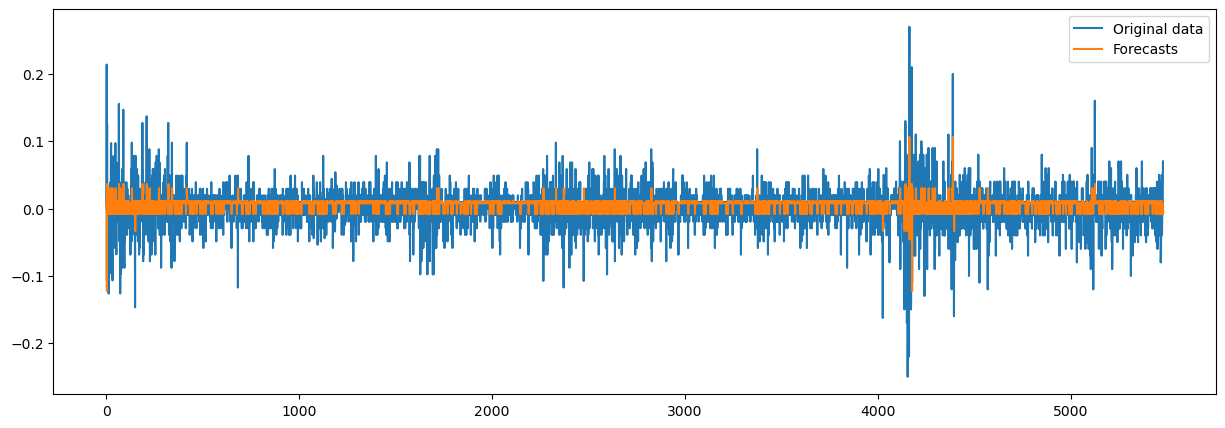

In [125]:
# Predict and Plot Results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

forecasts = model.predict(input_data)
forecasts.insert(0,input_data[0])

orig, = plt.plot(input_data, label="Original data")
pred, = plt.plot(forecasts, label="Forecasts")

plt.legend(handles=[orig, pred])

In [135]:
"""
TO DO:
1. Figure out how to inverse differencing
"""

'\nTO DO:\n1. Figure out how to inverse differencing\n'

#### Testing effect of Stationarity

In [20]:
train = df.values.reshape(-1,)[:-365]
test = df.values.reshape(-1,)[-365:]

diff = Transformations.Differential(1)

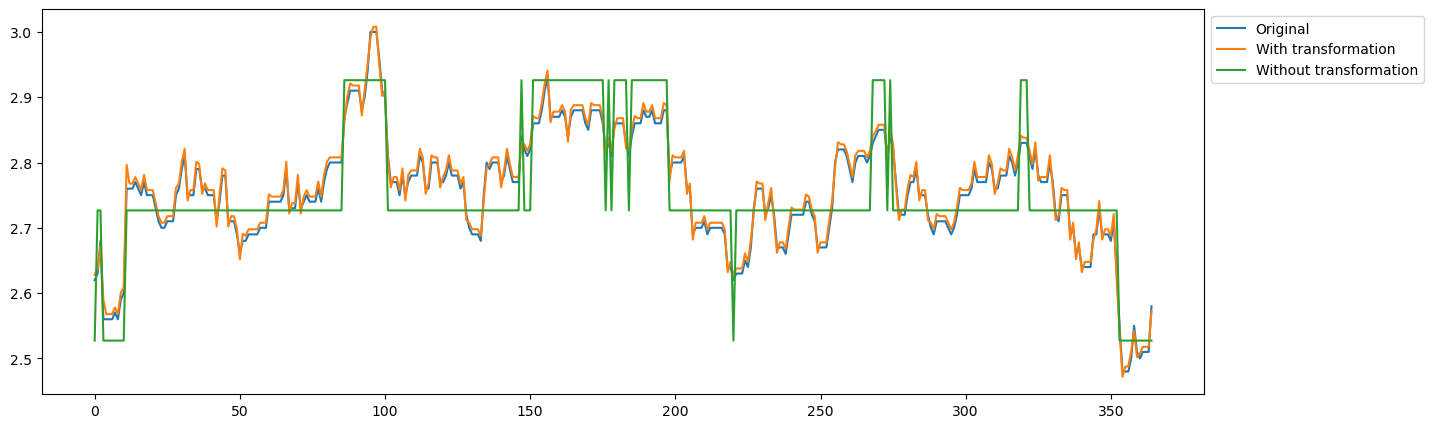

In [21]:
part1 = Grid.GridPartitioner(data=train, npart=15, transformation=diff)
part2 = Grid.GridPartitioner(data=train, npart=15)

model1 = chen.ConventionalFTS(partitioner=part1)
model1.append_transformation(diff)
model1.fit(train)

model2 = chen.ConventionalFTS(partitioner=part2)
model2.fit(train)

forecasts1 = model1.predict(test)
forecasts2 = model2.predict(test)

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=[15,5])

ax.plot(test, label='Original')
ax.plot(forecasts1, label='With transformation')
ax.plot(forecasts2, label='Without transformation')

handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))

In [216]:
"""
DONE:
1. Boilerplate code for Fuzzy Time Series Prediction that works

TO DO:
1. Figure out how differencing transformation is applied and how model works internally
2. Manual implementation of fuzzy partitioning
3. C-means implementation to optimize the number of partitions parameter
"""

'\nDONE:\n1. Boilerplate code for Fuzzy Time Series Prediction that works\n\nTO DO:\n1. Figure out how differencing transformation is applied and how model works internally\n2. Manual implementation of fuzzy partitioning\n3. C-means implementation to optimize the number of partitions parameter\n'